# Import Necessary Libraries

In [32]:
from exa_py import Exa
from collections import Counter
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# Initialize Exa with your API key
exa= Exa('Your-API-Key-Here')
# query = input("Search Here: ")


### Practice Query 1

In [22]:
# response = exa.search('best pizza in Brooklyn', num_results=10, start_published_date='2024-03-31', category='tweet',)
# print(response)

Title: @nycgov on X, 2025-03-07
URL: https://x.com/nycgov/status/1898122975859138771
ID: x.com/nycgov/status/1898122975859138771
Score: 0.44887834787368774
Published Date: 2025-03-07T00:00:00.000Z
Author: @nycgov
Image: None
Favicon: None
Extras: None
Subpages: None
Text: Time Out New York has declared Scarr's Pizza in the Lower East Side to be the top pizza spot in NYC and the second-best globally, trailing only a pizzeria in Naples. The city is celebrating this delicious honor!
Summary: None


Title: @sergenycscribe on X, 2024-10-29
URL: https://x.com/sergenycscribe/status/1851299671903494654
ID: x.com/sergenycscribe/status/1851299671903494654
Score: 0.4341689944267273
Published Date: 2024-10-29T00:00:00.000Z
Author: @sergenycscribe
Image: None
Favicon: None
Extras: None
Subpages: None
Text: A recent New York Times article highlights 25 exceptional pizza spots in NYC, featuring both well-known and surprising establishments. The list challenges conventional favorites while celebrating

### Practice Query 2

In [ ]:
# query = input('Search here: ')
# response = exa.search(query, num_results=5, type='keyword', include_domains=['https://www.tiktok.com'],)
# print(response)

Title: 2024 Christmas Haul | Lola Winters PR Haul & Gift Wrapping ...
URL: https://www.tiktok.com/@its_lola.winters/video/7452006715261930798
ID: https://www.tiktok.com/@its_lola.winters/video/7452006715261930798
Score: None
Published Date: 
Author: 
Image: None
Favicon: None
Extras: None
Subpages: None
Text: Log in

Log in

Introducing keyboard shortcuts!

Go to previous video

Go to next video

Like video

Mute / unmute video

Play / Pause

Skip forward

Skip backward

Full screen
Summary: None

Resolved Search Type: keyword
CostDollars: total=0.0035
  - search: {'keyword': 0.0025}
  - contents: {'text': 0.001}


## Official Query

Note: difference between type='neural' and type='keyword' is that 
neural uses AI to understand the context of the query and provide more relevant results, 
while keyword simply matches the keywords in the query to the content of the pages. 

In [29]:

hashtags = []
query = input('Search here: ')

# Set response to search results from TikTok

response = exa.search(query, num_results= 9, type='neural', include_domains=['tiktok.com'],)

# Iterate through the results, extract hashtags, and perform sentiment analysis
for result in response.results:
    hashtags += re.findall(r"#\w+", result.text.lower())
    sentiment = TextBlob(result.text).sentiment.polarity
    print(f'Title: {result.title}')
    print(f'URL: {result.url}')
    print(f"{result.title} - {'Positive' if sentiment > 0 else 'Negative' if sentiment < 0 else 'Neutral'}")
    print()

top = Counter(hashtags).most_common(5)
print(top)

Title: Ken on TikTok
URL: https://www.tiktok.com/@ken.arrington/video/7442755274445933870
Ken on TikTok - Positive

Title: Mariah Carey on TikTok
URL: https://www.tiktok.com/@mariahcarey/video/7160892761473027374?lang=en
Mariah Carey on TikTok - Positive

Title: TikTok - Make Your Day
URL: https://www.tiktok.com/discover/melania-talking-about-christmas-decorations
TikTok - Make Your Day - Neutral

Title: How Many Months How Many More Months Until Christmas | TikTok
URL: https://www.tiktok.com/discover/how-many-months-how-many-more-months-until-christmas
How Many Months How Many More Months Until Christmas | TikTok - Positive

Title: Log in | TikTok
URL: https://www.tiktok.com/discover/christmas-traditions-in-sweden
Log in | TikTok - Positive

Title: Christmas Tree That Puts Itself Up | TikTok
URL: https://www.tiktok.com/discover/christmas-tree-that-puts-itself-up
Christmas Tree That Puts Itself Up | TikTok - Positive

Title: Great Big Story on TikTok
URL: https://www.tiktok.com/@greatb

# Trend Evolution Timeline - Hashtags Over Time
### 2022-2025

In [ ]:
# Prompt user for a search topic
query = input("Search topic here(e.g. 'summer fashion', 'fall favorites', 'trending music'): ").strip()
if not query:
    raise ValueError("Search query cannot be empty.")

years = [2022, 2023, 2024, 2025]
trend_data = {}

# Collect hashtag trends for each year
for year in years:
    response = exa.search(query = f"{query} TikTok {year}",num_results = 15, type='neural', include_domains=['tiktok.com'])
    hashtags = []
    for result in response.results:
        text = (getattr(result, "text", "") or getattr(result, "title", "")).lower()
        hashtags += re.findall(r"#\w+", text)
    trend_data[year] = Counter(hashtags)

for year, tags in trend_data.items():
    print(f"{year}: {tags.most_common(5)}")


2022: [('#christmas', 20), ('#fyp', 12), ('#todayshow', 10), ('#christmaslist', 8), ('#foryou', 8)]
2023: [('#christmas', 20), ('#inflatable', 14), ('#fyp', 11), ('#trickghastly', 9), ('#christmastime', 8)]
2024: [('#christmas', 47), ('#fyp', 43), ('#christmascountdown', 21), ('#christmastiktok', 18), ('#christmas2025', 15)]
2025: [('#christmas', 68), ('#fyp', 42), ('#christmascountdown', 21), ('#viral', 20), ('#dresstoimpress', 20)]


In [33]:
print(tags)

Counter({'#christmas': 79, '#fyp': 30, '#christmastree': 25, '#christmascountdown': 23, '#christmasdecor': 23, '#christmastiktok': 20, '#xmas': 15, '#diy': 15, '#christmas2024': 12, '#diychristmas': 11, '#scrooge': 11, '#winter': 10, '#merrychristmas': 10, '#achristmascarol': 9, '#tinsel': 9, '#christmastok': 8, '#cozychristmas': 8, '#christmasaesthetic': 8, '#christiantiktok': 8, '#foryoupage': 8, '#christmasdecorations': 8, '#christmastreedecorating': 8, '#christmasdecorating': 8, '#viral': 7, '#christmasvibes': 7, '#christmascrafts': 7, '#christmasfyp': 6, '#growandstow': 6, '#diyproject': 6, '#bahhumbug': 6, '#ebenezerscrooge': 6, '#christmas2025': 5, '#december': 5, '#homedecor': 5, '#snow': 5, '#foryou': 5, '#viralchristmastree': 5, '#mommashive': 5, '#holidaydecor': 5, '#fypシ': 5, '#christmasdiy': 5, '#diychristmasdecor': 5, '#holidays': 4, '#xmasfyp': 4, '#nostalgic': 4, '#christmasiscoming': 4, '#christmaslights': 4, '#christmasideas': 4, '#floatingtree': 4, '#interiordesign':

# Visualize Hashtag Trends
### 2022 - 2025

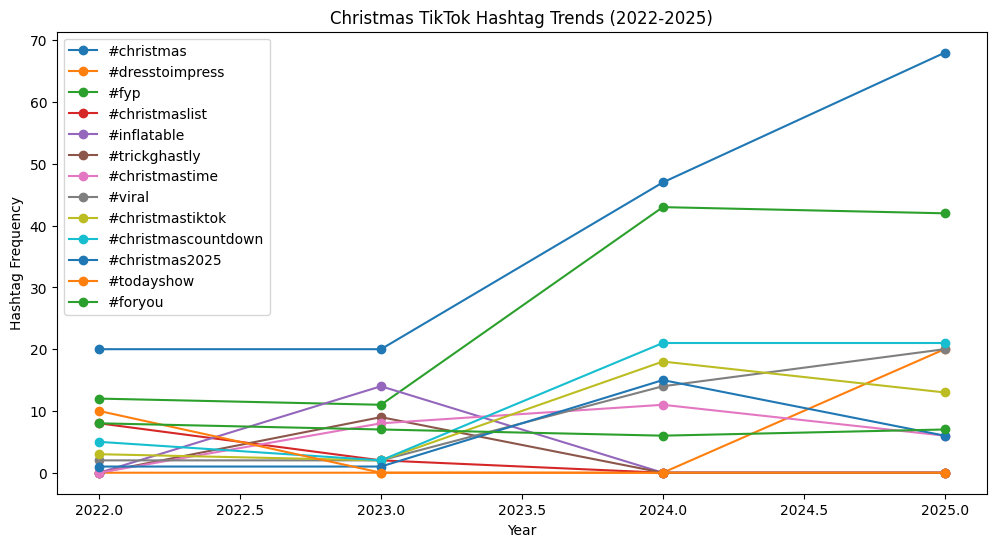

In [ ]:
# Visualize the hashtag trends for user input
plt.figure(figsize=(12, 6))
for tag in set([tag for year_tags in trend_data.values() for tag, _ in year_tags.most_common(5)]):
    plt.plot(years, 
             [trend_data[year][tag] for year in years], marker='o', label=tag)
    

plt.legend()
plt.title(f"{query.title()} TikTok Hashtag Trends (2022-2025)")
plt.xlabel("Year")
plt.ylabel("Hashtag Frequency")
plt.show()